In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Fake.csv to Fake (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving True.csv to True.csv


In [ ]:
import pandas as pd

# Load the datasets
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

# Add labels: 0 for fake news, 1 for true news
fake_df["label"] = 0
true_df["label"] = 1

# Combine the datasets and shuffle
data = pd.concat([fake_df, true_df], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

# Show first 5 rows
data.head()


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Download stopwords if needed
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)                     # remove URLs
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply cleaning to the text column
data["text"] = data["text"].apply(clean_text)

data.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,21st centuri wire say ben stein reput professo...,US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,washington reuter us presid donald trump remov...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,reuter puerto rico governor ricardo rossello s...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,monday donald trump embarrass countri accident...,News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,glasgow scotland reuter us presidenti candid g...,politicsNews,"June 24, 2016",1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predict on test set
y_pred = model.predict(X_test_vec)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


NameError: name 'X_train_vec' is not defined

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Initialize vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform training data, transform test data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9868596881959911

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



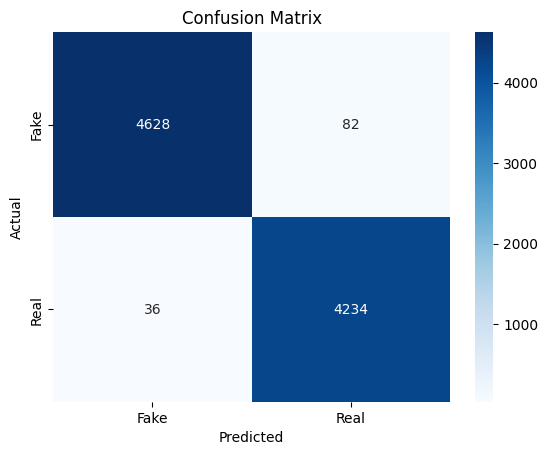

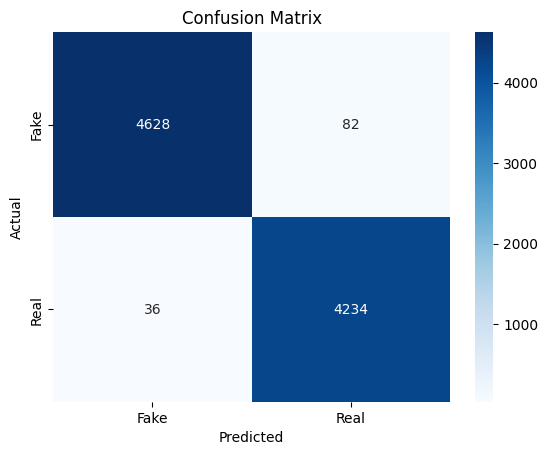

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
rf_pred = rf.predict(X_test_vec)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.9976614699331848


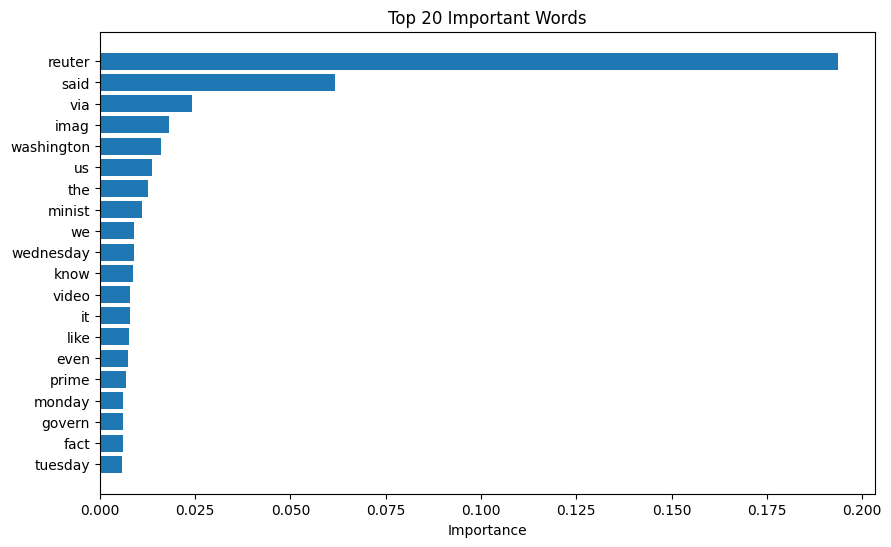

In [ ]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
importances = rf.feature_importances_
indices = np.argsort(importances)[-20:]  # top 20

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Top 20 Important Words")
plt.xlabel("Importance")
plt.show()


In [ ]:
!pip install shap


In [ ]:
import shap
shap.initjs()  # Only needed for some interactive plots


In [ ]:
X_sample = X_test_vec[:100].toarray()  # limit to first 100 samples


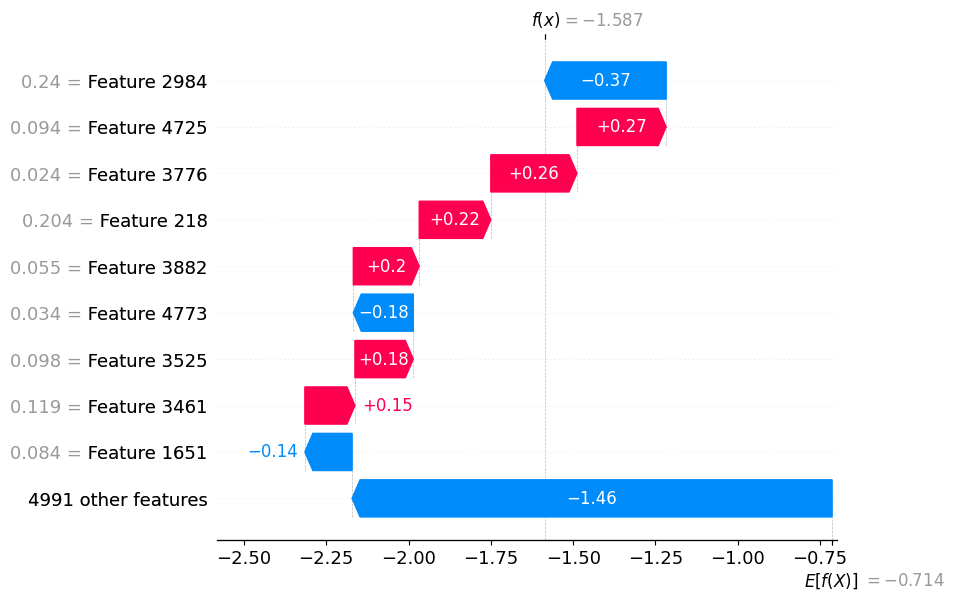

In [ ]:
explainer = shap.Explainer(model, X_sample)
shap_values = explainer(X_sample)

# Plot a single prediction
shap.plots.waterfall(shap_values[0])
